In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
messages=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
messages['message']=messages['v2']
messages['label']=messages['v1'].map({'ham':0, 'spam':1})
messages.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'v1', 'v2'], axis=1, inplace=True)
messages.head(10)

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


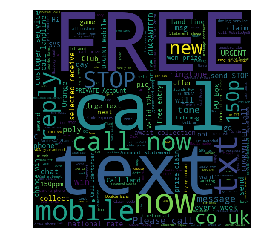

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
spam_words=' '.join(list(messages[messages['label']==1]['message']))
wordcl=WordCloud(background_color='black', width=512, height=512).generate(spam_words)
plt.imshow(wordcl)
plt.axis('off')
plt.show()

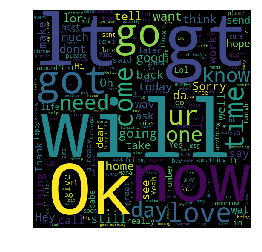

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
nonspam_words=' '.join(list(messages[messages['label']==0]['message']))
wordcl2=WordCloud(background_color='black', width=512, height=512).generate(nonspam_words)
plt.imshow(wordcl2)
plt.axis('off')
plt.show()

In [5]:
import nltk
from nltk.corpus import stopwords
import string

In [6]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in  stopwords.words('english')]
    return " ".join(text)

In [7]:
messages.message=messages.message.apply(lambda x: x.lower())
messages.message=messages.message.apply(text_preprocess)
messages.head(20)

,message,label
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry 2 wkly comp win fa cup final tkts 2...,1
3,u dun say early hor u c already say,0
4,nah dont think goes usf lives around though,0
5,freemsg hey darling 3 weeks word back id like ...,1
6,even brother like speak treat like aids patent,0
7,per request melle melle oru minnaminunginte nu...,0
8,winner valued network customer selected receiv...,1
9,mobile 11 months u r entitled update latest co...,1


In [8]:
from nltk.stem import SnowballStemmer
snowball=SnowballStemmer('english')
def stemmer(text):
    text=text.split()
    words=""
    for i in text:
        words+=snowball.stem(i)+" "
    return words


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer("english")
messages.message=messages.message.apply(stemmer)
message_mat = vectorizer.fit_transform(messages.message)
result_mat=messages['label']
message_mat=message_mat.todense()

In [10]:
from sklearn.model_selection import train_test_split
message_train, message_test, result_train, result_test=train_test_split(message_mat, messages['label'], test_size=0.3, random_state=15)


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model= GaussianNB()
model.fit(message_train, result_train)
prediction=model.predict(message_test)
accuracy_score(result_test, prediction)

0.881578947368421

In [12]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model, message_mat, result_mat)
score

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.8729817 , 0.87883683, 0.88422186])